## **Regression Model for Digital Marketing Outcome**

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **Loading the Data**

In [94]:
import pandas as pd
data = pd.read_csv('/content/Ecommerce_Consumer_Behavior_Analysis_Data (1).csv')
data.head()




,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4




```
`# This is formatted as code`
```

Good morning, everyone. As a marketing major, I’ve always been fascinated by why people buy things. We often talk about the 'consumer journey' in theory, but today I want to show you what that looks like in raw numbers. For my analysis project, I selected the E-commerce Consumer Behavior Dataset, which essentially captures the digital footprint of online shoppers."



The Goal: "This project is designed to solve a business problem: Understanding Customer Behavior. We aren't just looking at data; we are building a Machine Learning pipeline to predict whether a customer will likely make a purchase (Purchase Intent) based on their demographics and browsing history."
To achieve this, we used Python as our core language, leveraging powerful libraries like Pandas for handling data and Scikit-Learn for building our Artificial Intelligence models."

# **Checking Data Info**

In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [ ]:
data.shape

(1000, 28)

The code takes a raw dataset of 1,000 customer records and puts it through a rigorous 'refining' process:


**Checking Null Values, Missing Values and Duplicated Values**


In [ ]:
# Check Null Values
data.isnull().values.any()

np.True_

In [ ]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 503 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
data = data.drop(columns=['Customer_ID'])


In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset index after dropping duplicates
data.reset_index(drop=True, inplace=True)

print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 1000


In [ ]:
# Check for missing values after reloading
missing_values_count = data.isnull().sum().sum()
print(f"Number of missing values in the reloaded data: {missing_values_count}")

if missing_values_count > 0:
    # Remove rows with any missing values
    initial_rows = data.shape[0]
    data.dropna(inplace=True)
    final_rows = data.shape[0]
    print(f"Removed {initial_rows - final_rows} rows with missing values.")
    print(f"Remaining rows: {final_rows}")
    print("Data after removing rows with missing values. First 5 rows:")
    display(data.head())
else:
    print("No missing values found after reloading the data.")

Number of missing values in the reloaded data: 503
Removed 436 rows with missing values.
Remaining rows: 564
Data after removing rows with missing values. First 5 rows:


,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
1,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
6,21,Female,Middle,Divorced,High School,Middle,Liren,Furniture,$486.40,12,...,9,Low,Desktop,Debit Card,3/15/2024,True,False,Need-based,Express,13
8,24,Female,High,Divorced,Master's,Middle,Gråbo,Office Supplies,$201.96,8,...,2,High,Desktop,Cash,6/10/2024,False,False,Need-based,Standard,7
10,33,Male,Middle,Divorced,Bachelor's,Middle,Punta Gorda,Mobile Accessories,$389.70,12,...,4,High,Desktop,PayPal,7/2/2024,True,False,Planned,Express,12


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
len(data.columns)

27

# **Descriptive Analysis**

In [ ]:
data.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,33.769504,7.101064,2.985816,3.033688,1.005638,0.902482,5.304965,7.531915
std,9.154490,3.117372,1.426647,1.462595,0.791533,0.797015,2.850803,3.922976
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.000000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Visualization**

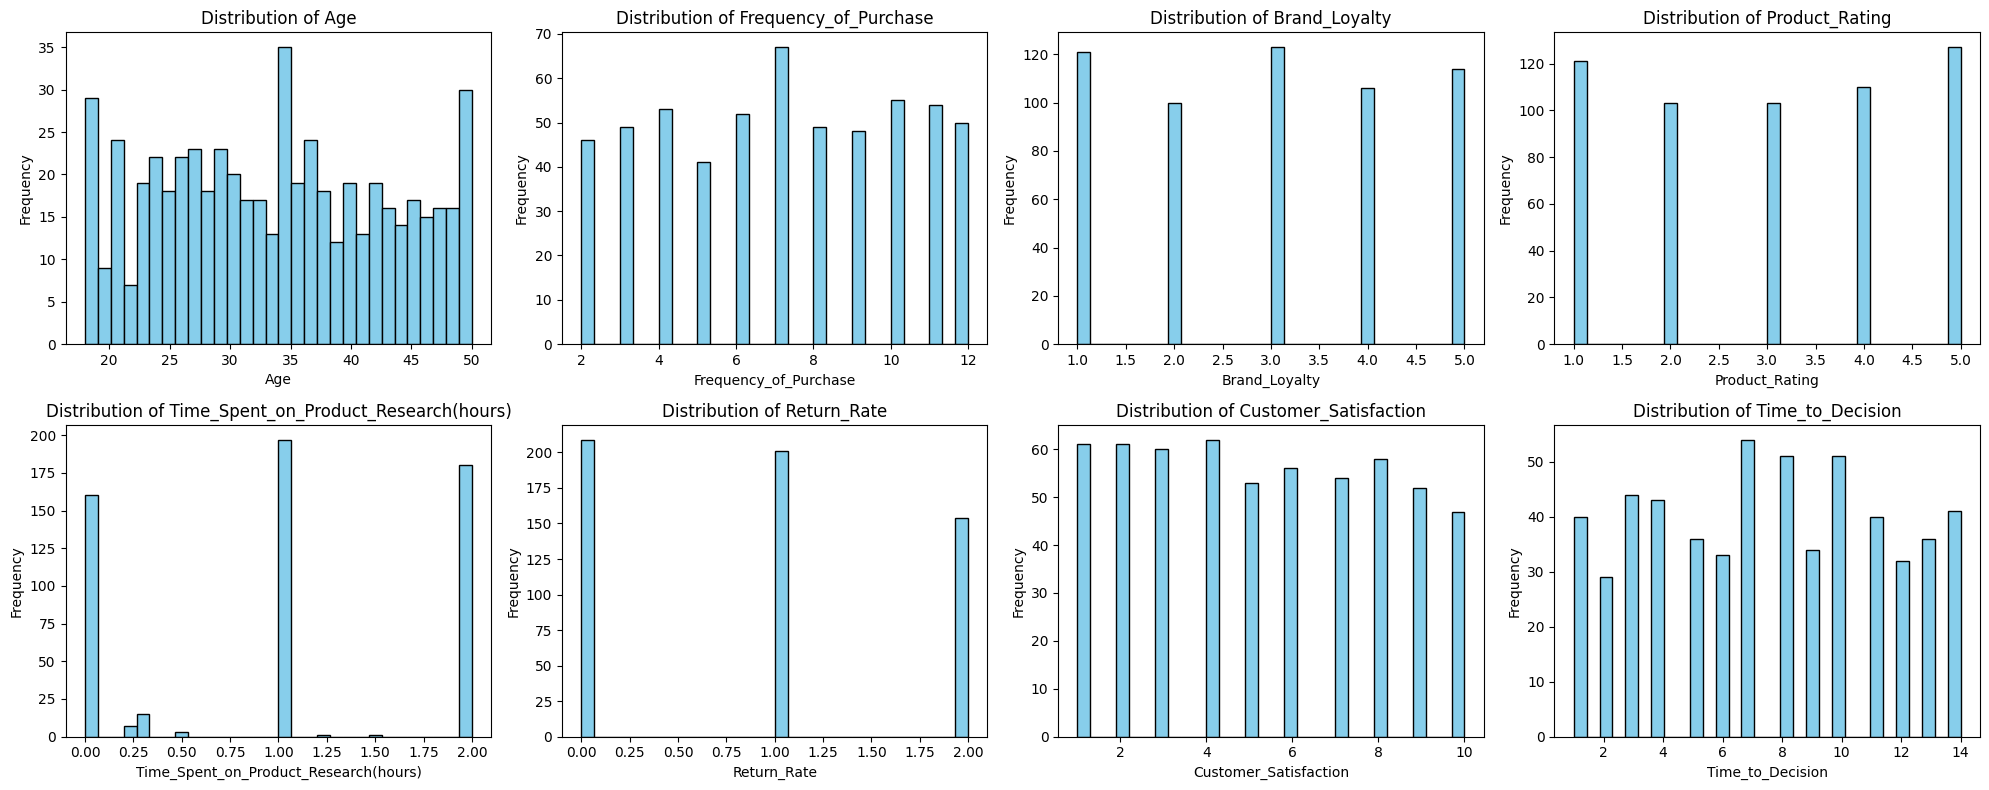

In [ ]:
# Identify numerical columns for plotting
numerical_columns = data.select_dtypes(include=np.number).columns

# Create a grid for the plots based on the number of numerical columns
# Assuming a maximum of 4 numerical columns for a 2x2 grid, adjust as needed
num_plots = len(numerical_columns)
if num_plots > 0:
    # Calculate rows and columns for the subplot grid dynamically
    n_cols = min(4, num_plots) # Max 4 columns per row
    n_rows = (num_plots + n_cols - 1) // n_cols # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Flatten the axes array to easily iterate over it, even for a single plot
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes]) # Make it iterable if only one subplot
    axes = axes.flatten()

    # Loop through the numerical columns and plot the histograms
    for i, column in enumerate(numerical_columns):
        if i < len(axes): # Ensure we don't go out of bounds if num_plots < len(axes)
            axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found to plot.")

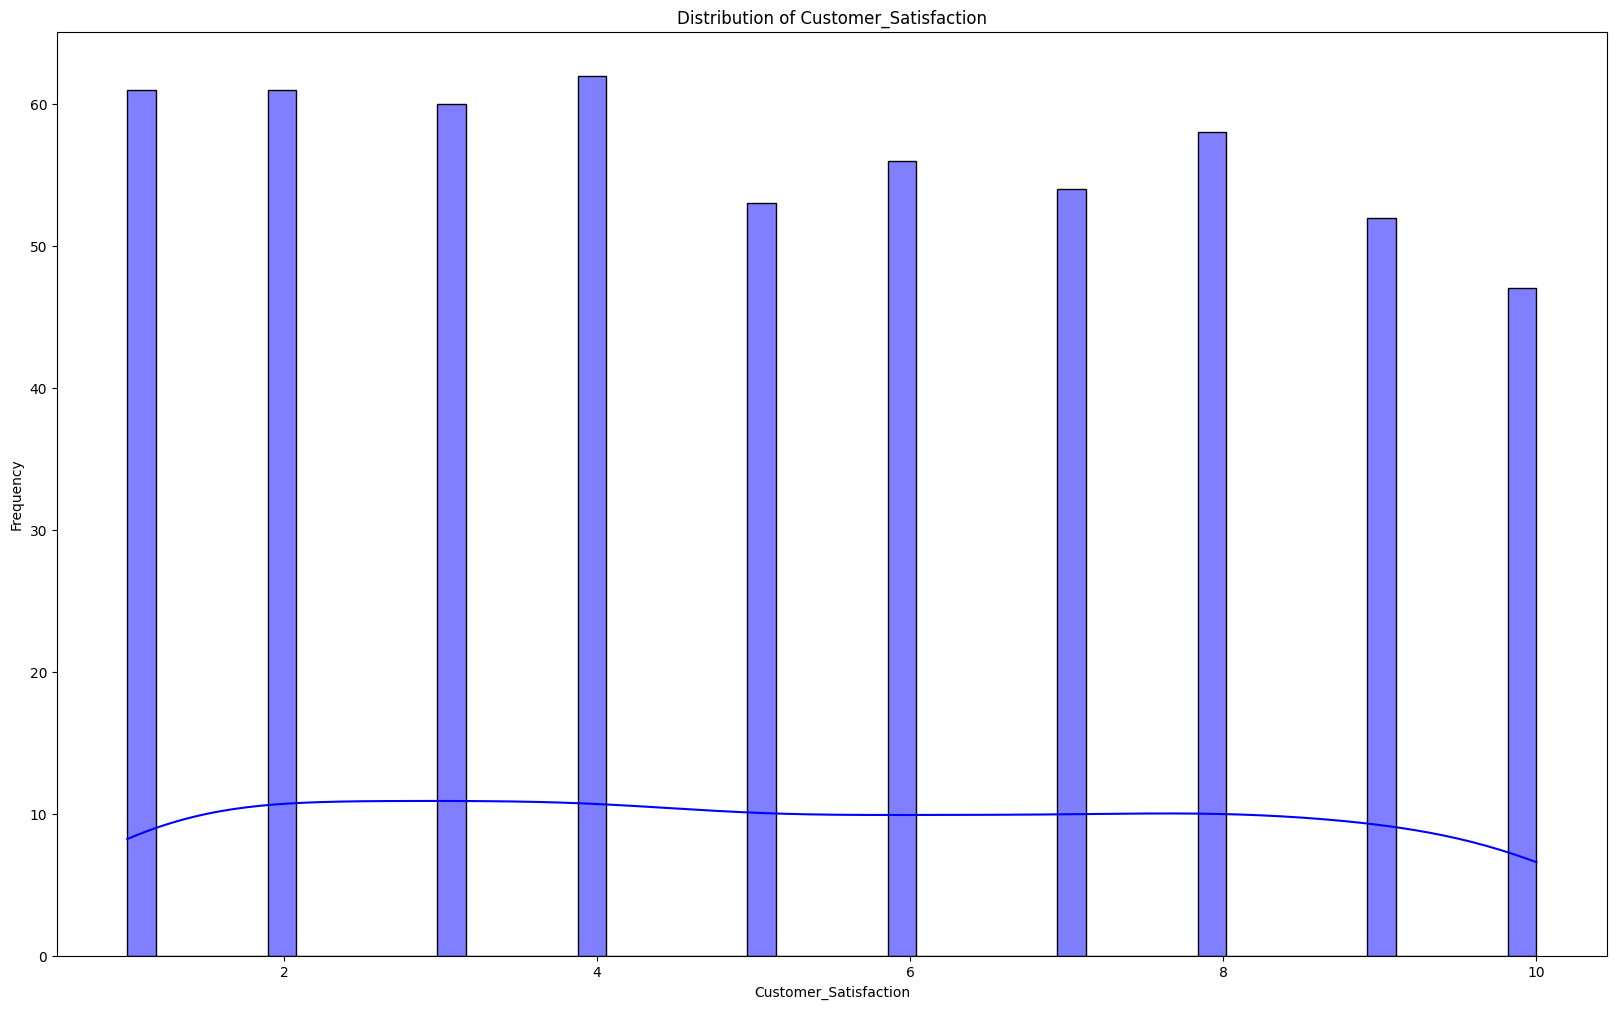

In [ ]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Customer_Satisfaction'], kde=True, color='blue', bins=50)
plt.title('Distribution of Customer_Satisfaction')
plt.xlabel('Customer_Satisfaction')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

In [ ]:
correlation_matrix

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Discount_Used,Customer_Loyalty_Program_Member,Time_to_Decision
Age,1.000000,-0.046858,0.037421,0.001377,0.025626,0.050957,-0.020850,0.056086,0.002834,0.034134
Frequency_of_Purchase,-0.046858,1.000000,-0.032426,-0.055287,-0.030306,0.014697,0.016512,0.005683,-0.024135,0.043235
Brand_Loyalty,0.037421,-0.032426,1.000000,-0.032118,-0.013834,0.031585,-0.011163,-0.051788,0.042190,-0.053871
Product_Rating,0.001377,-0.055287,-0.032118,1.000000,-0.031663,0.036345,-0.065089,-0.092357,0.023300,-0.017988
Time_Spent_on_Product_Research(hours),0.025626,-0.030306,-0.013834,-0.031663,1.000000,0.014951,0.016711,0.013585,-0.010642,0.052144
Return_Rate,0.050957,0.014697,0.031585,0.036345,0.014951,1.000000,0.076432,-0.044761,0.005377,0.046159
Customer_Satisfaction,-0.020850,0.016512,-0.011163,-0.065089,0.016711,0.076432,1.000000,0.020479,0.037246,0.031210
Discount_Used,0.056086,0.005683,-0.051788,-0.092357,0.013585,-0.044761,0.020479,1.000000,0.000567,0.000925
Customer_Loyalty_Program_Member,0.002834,-0.024135,0.042190,0.023300,-0.010642,0.005377,0.037246,0.000567,1.000000,-0.002175
Time_to_Decision,0.034134,0.043235,-0.053871,-0.017988,0.052144,0.046159,0.031210,0.000925,-0.002175,1.000000


# **Correlation Heatmap**

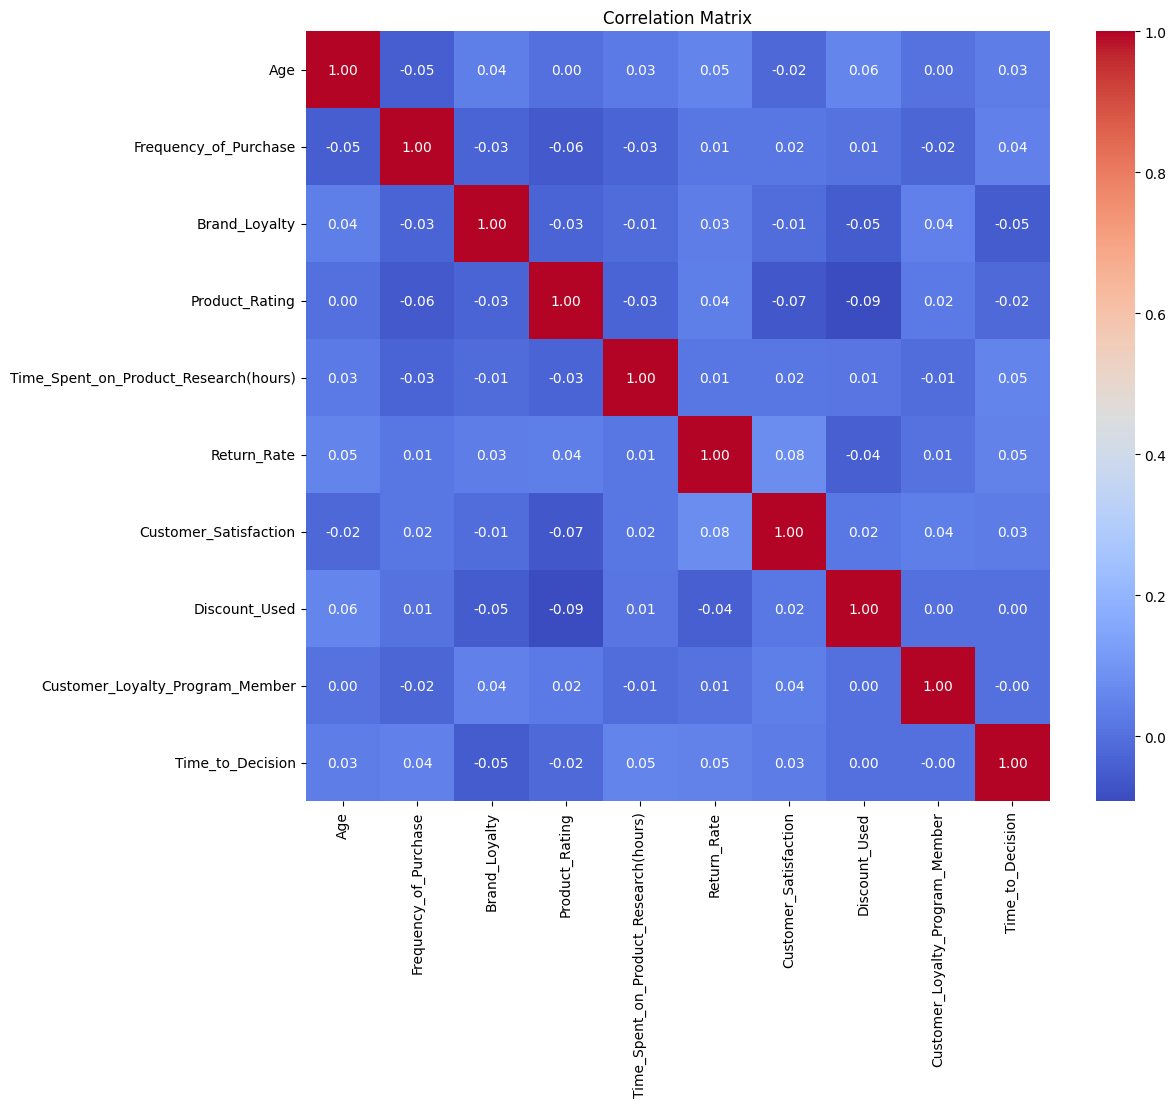

In [ ]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
missing_values

,0
Age,0
Gender,0
Income_Level,0
Marital_Status,0
Education_Level,0
Occupation,0
Location,0
Purchase_Category,0
Purchase_Amount,0
Frequency_of_Purchase,0


In [ ]:
# Step 3: Prepare the features (X) and target (y)
X = data.drop(columns=['Customer_Satisfaction'])
y = data['Customer_Satisfaction']

In [ ]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Handle potential missing numerical values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle potential missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert categorical to numerical
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to X
X_scaled = preprocessor.fit_transform(X)

In [ ]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(2.5497345132743368,
 8.624162831858408,
 np.float64(2.9366924986893688),
 0.8506087933698553,
 -0.09467320622676412)

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Use the trained SVR model to make predictions on the scaled testing data
y_pred_svr = svr_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics for the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics (optional, but good for verification)
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR MAPE: {mape_svr}")
print(f"SVR R2: {r2_svr}")

SVR MAE: 2.5084066057337857
SVR MSE: 8.197771836649244
SVR RMSE: 2.863175132025501
SVR MAPE: 0.8399243269151419
SVR R2: -0.04055099089618275


In [ ]:
# Define the parameter grid for GridSearchCV for the SVR model
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

In [ ]:
# Instantiate an SVR model with default parameters
svr = SVR()

# Instantiate GridSearchCV with the SVR model, the parameter grid, and 5-fold cross-validation
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['rbf', 'linear']})

In [ ]:
# Access the best SVR model from GridSearchCV
best_svr_model = grid_search_svr.best_estimator_

# Use the best SVR model to make predictions on the scaled test set
y_pred_best_svr = best_svr_model.predict(X_test)

# Calculate evaluation metrics for the best SVR model
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
rmse_best_svr = np.sqrt(mse_best_svr)
mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Print the metrics
print(f"Best SVR MAE: {mae_best_svr}")
print(f"Best SVR MSE: {mse_best_svr}")
print(f"Best SVR RMSE: {rmse_best_svr}")
print(f"Best SVR MAPE: {mape_best_svr}")
print(f"Best SVR R2: {r2_best_svr}")

Best SVR MAE: 2.4765000080472244
Best SVR MSE: 7.966243881084105
Best SVR RMSE: 2.822453521509983
Best SVR MAPE: 0.8315448040129
Best SVR R2: -0.01116292687292919


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN MAE: {mae_knn}")
print(f"KNN MSE: {mse_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAPE: {mape_knn}")
print(f"KNN R2: {r2_knn}")

KNN MAE: 2.488495575221239
KNN MSE: 8.79929203539823
KNN RMSE: 2.966360065028895
KNN MAPE: 0.8643046776232616
KNN R2: -0.11690252291298031


In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [ ]:
# Instantiate a KNeighborsRegressor with default parameters
knn = KNeighborsRegressor()

# Instantiate GridSearchCV with the KNN model, the parameter grid, and 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [ ]:
# Extract the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Extract the best KNN model
best_knn_model = grid_search.best_estimator_

In [ ]:
# Use the best model to make predictions on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the best KNN model
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
rmse_best_knn = np.sqrt(mse_best_knn)
mape_best_knn = mean_absolute_percentage_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

# Print the metrics
print(f"Best KNN MAE: {mae_best_knn}")
print(f"Best KNN MSE: {mse_best_knn}")
print(f"Best KNN RMSE: {rmse_best_knn}")
print(f"Best KNN MAPE: {mape_best_knn}")
print(f"Best KNN R2: {r2_best_knn}")

Best KNN MAE: 2.5792437650844726
Best KNN MSE: 8.938053097345133
Best KNN RMSE: 2.9896576889913558
Best KNN MAPE: 0.8841036790151834
Best KNN R2: -0.13451559673154545


In [ ]:
xgb_model = XGBRegressor(random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAPE: {mape_xgb}")
print(f"XGBoost R2: {r2_xgb}")

XGBoost MAE: 2.602668523788452
XGBoost MSE: 9.625110626220703
XGBoost RMSE: 3.1024362404762975
XGBoost MAPE: 0.8676412105560303
XGBoost R2: -0.22172439098358154


In [ ]:
# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
# Instantiate an XGBRegressor
xgb = XGBRegressor(random_state=42)

# Instantiate GridSearchCV with the XGBoost model, the parameter grid, and 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [ ]:
# Access the best hyperparameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_

# Access the best estimator (the trained XGBoost model)
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)

Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Use the best XGBoost model to make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for the best XGBoost model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the metrics
print(f"Best XGBoost MAE: {mae_best_xgb}")
print(f"Best XGBoost MSE: {mse_best_xgb}")
print(f"Best XGBoost RMSE: {rmse_best_xgb}")
print(f"Best XGBoost MAPE: {mape_best_xgb}")
print(f"Best XGBoost R2: {r2_best_xgb}")

Best XGBoost MAE: 2.481107234954834
Best XGBoost MSE: 8.065272331237793
Best XGBoost RMSE: 2.8399423112517255
Best XGBoost MAPE: 0.8427867293357849
Best XGBoost R2: -0.023732662200927734


In [ ]:
# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Get the names of the features after preprocessing
# This correctly accounts for one-hot encoded categorical features
processed_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': processed_feature_names, 'importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Function to clean feature names
def clean_feature_name(name):
    name = name.replace('num__', '')
    name = name.replace('cat__', '')
    return name

# Apply cleaning to feature names
feature_importance_df['cleaned_feature'] = feature_importance_df['feature'].apply(clean_feature_name)

# Display the top 15 feature importances with cleaned names
print("Top 15 Feature Importances (XGBoost):")
display(feature_importance_df[['cleaned_feature', 'importance']].head(15))

Top 15 Feature Importances (XGBoost):


,cleaned_feature,importance
1480,Purchase_Intent_Need-based,0.022087
1184,Payment_Method_PayPal,0.021805
602,Purchase_Category_Toys & Games,0.016456
4,Time_Spent_on_Product_Research(hours),0.016201
1177,Device_Used_for_Shopping_Desktop,0.015748
589,Purchase_Category_Gardening & Outdoors,0.015546
1180,Payment_Method_Cash,0.015455
18,Marital_Status_Married,0.015148
25,Occupation_Middle,0.014839
1179,Device_Used_for_Shopping_Tablet,0.014291


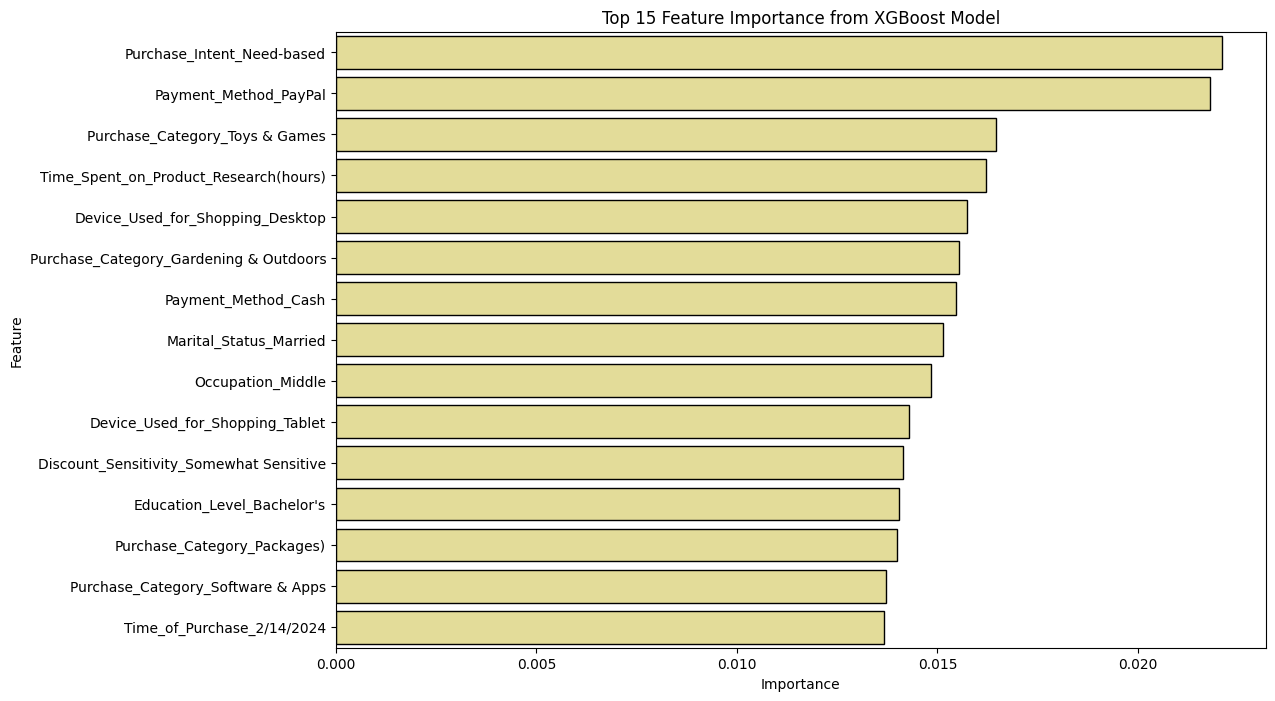

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='cleaned_feature', data=feature_importance_df.head(15), color='khaki', edgecolor='black')
plt.title('Top 15 Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# Convert X_test to a dense array as permutation_importance expects array-like input
perm_importance_svr = permutation_importance(best_svr_model, X_test.toarray(), y_test, random_state=42)

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()[::-1] # Sort in descending order

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

# Function to clean feature names
def clean_feature_name(name):
    name = name.replace('num__', '')
    name = name.replace('cat__', '')
    return name

# Apply cleaning to feature names
feature_importance_svr_df['cleaned_feature'] = feature_importance_svr_df['feature'].apply(clean_feature_name)

# Display the top 15 feature importances with cleaned names
print("Top 15 Permutation Feature Importances (SVR):")
display(feature_importance_svr_df[['cleaned_feature', 'importance']].head(15))

Top 15 Permutation Feature Importances (SVR):


,cleaned_feature,importance
0,Product_Rating,0.001933
1,Return_Rate,0.000953
2,Age,0.000664
3,Income_Level_High,0.000624
4,Income_Level_Middle,0.000624
5,Payment_Method_PayPal,0.000479
6,Purchase_Intent_Planned,0.000385
7,Discount_Sensitivity_Not Sensitive,0.000295
8,Discount_Sensitivity_Very Sensitive,0.000263
9,Time_to_Decision,0.000229


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# Convert X_test to a dense array as permutation_importance expects array-like input
perm_importance_svr = permutation_importance(best_svr_model, X_test.toarray(), y_test, random_state=42)

# Get the feature importances and sort them in descending order
sorted_idx = perm_importance_svr.importances_mean.argsort()[::-1]

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

# Function to clean feature names
def clean_feature_name(name):
    name = name.replace('num__', '')
    name = name.replace('cat__', '')
    return name

# Apply cleaning to feature names
feature_importance_svr_df['cleaned_feature'] = feature_importance_svr_df['feature'].apply(clean_feature_name)

# Display the top 15 feature importances with cleaned names (optional, for verification)
print("Top 15 Permutation Feature Importances (SVR) after fix:")
display(feature_importance_svr_df[['cleaned_feature', 'importance']].head(15))

Top 15 Permutation Feature Importances (SVR) after fix:


,cleaned_feature,importance
0,Product_Rating,0.001933
1,Return_Rate,0.000953
2,Age,0.000664
3,Income_Level_High,0.000624
4,Income_Level_Middle,0.000624
5,Payment_Method_PayPal,0.000479
6,Purchase_Intent_Planned,0.000385
7,Discount_Sensitivity_Not Sensitive,0.000295
8,Discount_Sensitivity_Very Sensitive,0.000263
9,Time_to_Decision,0.000229


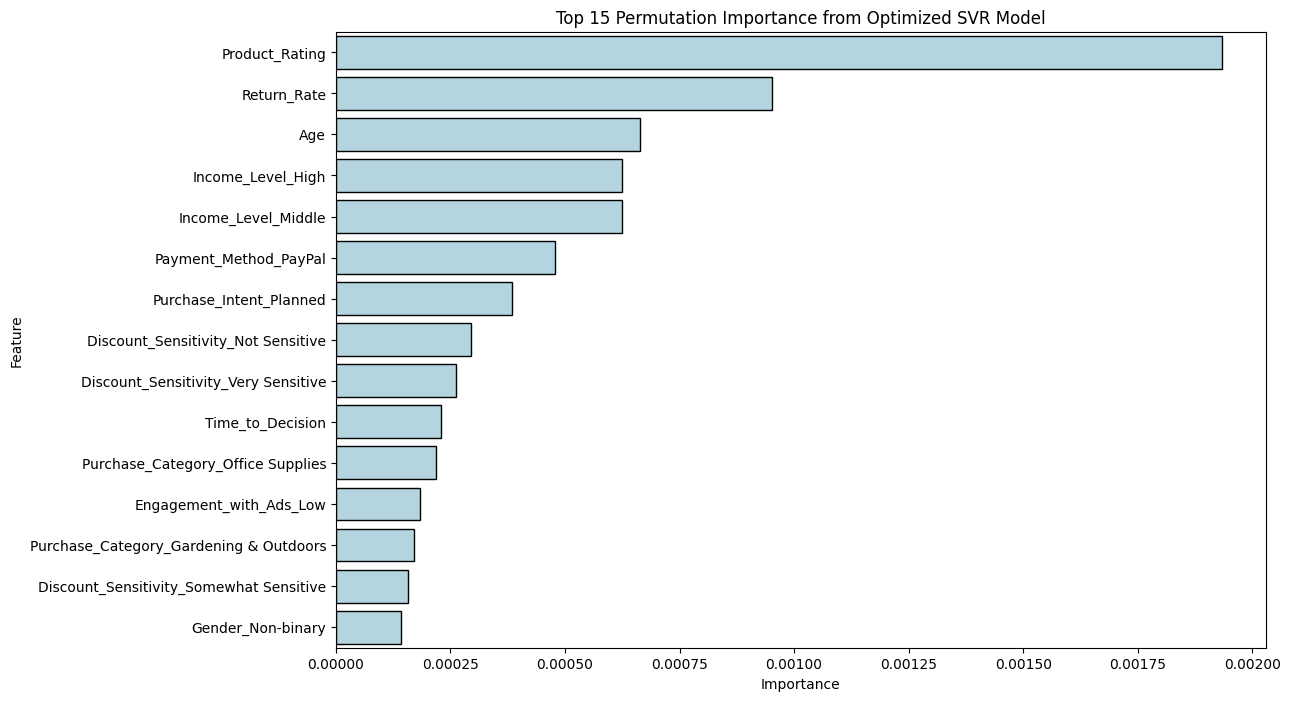

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='cleaned_feature', data=feature_importance_svr_df.head(15), color='lightblue', edgecolor='black')
plt.title('Top 15 Permutation Importance from Optimized SVR Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Define Features (X) and Target (y)
# Drop 'Customer_Satisfaction' as it was the target for the previous regression task.
# 'Income_Level' is chosen as a new target for this classification task.
X = data.drop(columns=['Income_Level', 'Customer_Satisfaction'])
y = data['Income_Level'] # New classification target

# 2. Encode Categorical Data
# Convert 'Age' to numeric if it was read as object/category
X['Age'] = pd.to_numeric(X['Age'], errors='coerce')

# Identify categorical features in X for one-hot encoding
categorical_cols_for_ohe = X.select_dtypes(include='object').columns

X = pd.get_dummies(X, columns=categorical_cols_for_ohe, drop_first=True)

# Label Encoding for the Target Variable
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (564, 1470)
Target shape: (564,)


# **Split the Data**

In [ ]:
#Step 7: Split the Data


from sklearn.model_selection import train_test_split

# Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (451, 1470)
Testing set size: (113, 1470)


In [ ]:
#Step 8: Scaling (Normalization / Standardization)

from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Fit on training set only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
#Step 9: Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Handle potential NaNs in the scaled data before feature selection
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Select top 10 features (or fewer depending on your data columns)
# Using ANOVA F-value since inputs are numerical and target is categorical
selector = SelectKBest(score_func=f_classif, k='all') # Set k=5 or 'all'
X_train_selected = selector.fit_transform(X_train_scaled_imputed, y_train)
X_test_selected = selector.transform(X_test_scaled_imputed)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)', 'Return_Rate', 'Discount_Used', 'Customer_Loyalty_Program_Member', 'Time_to_Decision', 'Gender_Bigender', 'Gender_Female', 'Gender_Genderfluid', 'Gender_Genderqueer', 'Gender_Male', 'Gender_Non-binary', 'Gender_Polygender', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widowed', 'Education_Level_High School', "Education_Level_Master's", 'Occupation_Middle', 'Location_Abaeté', 'Location_Adela', 'Location_Aguilares', 'Location_Al Jīzah', 'Location_Al Khānkah', 'Location_Al Qarārah', 'Location_Al Qārah', 'Location_Amparo', 'Location_Anding', 'Location_Anyang', 'Location_Araci', 'Location_Arendal', 'Location_Argenteuil', 'Location_Arhust', 'Location_Arnprior', 'Location_As Sawdā', 'Location_At-Bashi', 'Location_Autun', 'Location_Badajoz', 'Location_Baihe', 'Location_Bailadores', 'Location_Bairan', 'Location_Baisha', 'Location_Bamut', 'Location

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  27   31   40   43   46   49   58   63   67   71   76   80   81   82
   84   85   86   88   91   96  101  110  111  125  133  135  140  145
  147  150  151  155  157  163  165  172  173  187  192  199  205  208
  210  212  214  217  222  229  235  237  242  248  256  261  272  276
  279  280  281  283  286  293  296  301  307  311  313  314  316  320
  327  330  336  343  347  348  352  357  358  359  362  369  381  400
  401  424  432  434  439  442  443  448  463  466  470  471  495  506
  507  510  513  519  530  531  533  536  538  547  551  556  571  572
  625  631  640  642  645  656  660  666  668  672  676  679  685  689
  692  693  695  699  700  712  713  715  718  721  726  731  745  749
  750  755  761  764  769  771  773  774  791  810  814  815  820  823
  826  827  836  842  845  854  858  864  867  868  871  872  874  880
  881  900  904  908  915  916

# **Model Training & Testing**

In [ ]:
#Step 10, 11, 12: Model Build, Train, and Test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store predictions
predictions = {}

for name, model in models.items():
    # Step 10 & 11: Build and Train
    model.fit(X_train_selected, y_train)

    # Step 12: Model Test
    y_pred = model.predict(X_test_selected)
    predictions[name] = y_pred
    print(f"{name} trained and tested.")

Logistic Regression trained and tested.
Random Forest trained and tested.
Support Vector Machine trained and tested.


# **Model Training & Testing**

In [ ]:
#Step 13: Model Evaluate

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

results = {}

for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_, labels=le.transform(le.classes_)))

    # Optional: Plot Confusion Matrix
    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'Confusion Matrix: {name}')
    # plt.show()
    print("\n")

--- Logistic Regression ---
Accuracy: 0.5664
              precision    recall  f1-score   support

        High       0.59      0.58      0.59        60
      Middle       0.54      0.55      0.54        53

    accuracy                           0.57       113
   macro avg       0.57      0.57      0.57       113
weighted avg       0.57      0.57      0.57       113



--- Random Forest ---
Accuracy: 0.5221
              precision    recall  f1-score   support

        High       0.53      0.77      0.63        60
      Middle       0.48      0.25      0.33        53

    accuracy                           0.52       113
   macro avg       0.51      0.51      0.48       113
weighted avg       0.51      0.52      0.49       113



--- Support Vector Machine ---
Accuracy: 0.5664
              precision    recall  f1-score   support

        High       0.56      0.88      0.68        60
      Middle       0.61      0.21      0.31        53

    accuracy                           0.57   

# **Model Comparison**

In [ ]:
#Step 14: Compare and Choose the Best Model

# 1. Compare models
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

# 2. Feature Importance (if applicable, e.g., Random Forest)
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance_df)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Best Model')
    plt.show()
else:
    print(f"Feature importance plot not available for {best_model_name} (only available for tree-based models).")

🏆 Best Model: Logistic Regression with Accuracy: 0.5664
Feature importance plot not available for Logistic Regression (only available for tree-based models).


In [ ]:
#Step 15: Save the Best Model

import joblib

# Save the model
filename = 'best_model.pkl'
joblib.dump(best_model, filename)

# Also save the scaler and label encoder for preprocessing new data later
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print(f"Model saved as {filename}")

Model saved as best_model.pkl
